<div align="center">
    <h1>МИНОБРНАУКИ РОССИИ                  </h1>
    <h1>САНКТ-ПЕТЕРБУРГСКИЙ ГОСУДАРСТВЕННЫЙ </h1>
    <h1>ЭЛЕКТРОТЕХНИЧЕСКИЙ УНИВЕРСИТЕТ      </h1>
    <h1>"ЛЭТИ" ИМ. В.И. УЛЬЯНОВА (ЛЕНИНА)   </h1>
    <h1>Кафедра МО ЭВМ                      </h1>
</div>

<br>
<br>
<br>
<br>

<div align="center">
    <h1>ОТЧЕТ                               </h1>
    <h2>по лабораторной работе №2           </h2>
    <h2>По дисциплине "Машинное Обучение"   </h2>
    <h2>Тема: Понижение размерности пространства признаков          </h2>
</div>

<br>
<br>
<br>
<br>

<style>
    td, th {
        border: none!important
    }
</style>
<div align="center" style="border: none!important">
    Студентка гр. 8303:  ________________ Самойлова А.С.
    <br>
    <br>
    Преподаватель:    ________________ Жангиров Т.Р.
</div>

<br>
<br>
<br>

<div align="center">
    <sub>
        Санкт-Петербург <br>
        2021
    </sub>
</div>

<br>
<br>
<br>

------------------------

In [20]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA, SparsePCA, FactorAnalysis

def display_data(data):
    fig, axs = plt.subplots(2, 4, figsize=(20, 10))
    for i in range(data.shape[1]-1):
        axs[i // 4, i % 4].scatter(data[:,i],data[:,(i+1)],c=labels,cmap='Set1')
        axs[i // 4, i % 4].set_xlabel(var_names[i])
        axs[i // 4, i % 4].set_ylabel(var_names[i+1])
    plt.show()

df = pd.read_csv('glass.csv')
print(df)

          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]


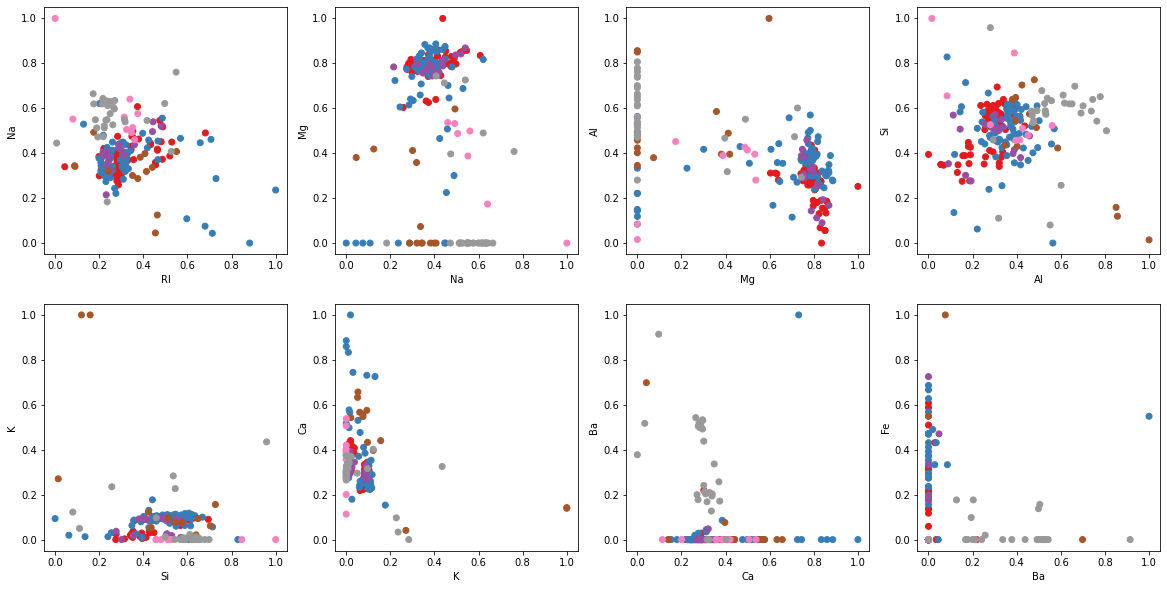

In [2]:
var_names = list(df.columns) #получение имен признаков
labels = df.to_numpy('int')[:,-1] #метки классов
data = df.to_numpy('float')[:,:-1] #описательные признаки

data = preprocessing.minmax_scale(data)
display_data(data)

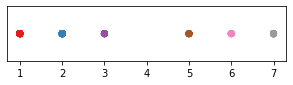

In [3]:
# соответствие цвета на диаграмме и класса в датасете

plt.figure(figsize=(5, 1))
plt.tick_params(axis="y", which="both", right=False, left=False, labelleft=False)
plt.scatter(labels, [0]*len(labels), c=labels, cmap="Set1")
plt.show()

## Метод главных компонент

In [4]:
pca = PCA(n_components = 2)
pca_data = pca.fit(data).transform(data)

print('Объясненная дисперсия в %: ', pca.explained_variance_ratio_)
print('Собственные числа:         ', pca.singular_values_)

Объясненная дисперсия в %:  [0.45429569 0.17990097]
Собственные числа:          [5.1049308  3.21245688]


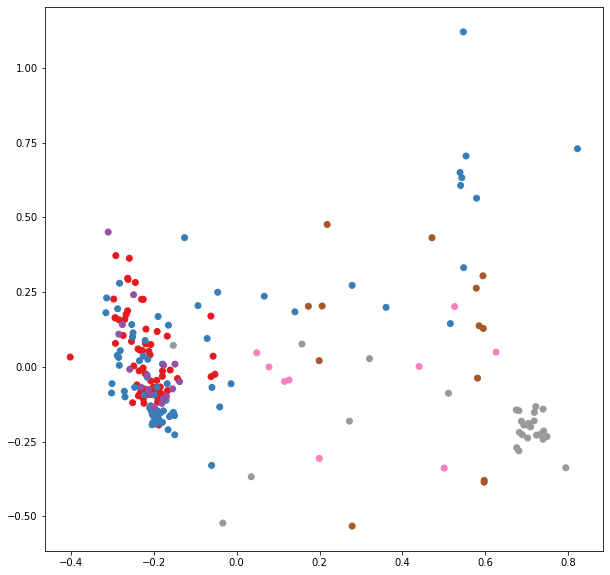

In [5]:
# Диаграмма рассеяния

plt.figure(figsize=(10, 10))
plt.scatter(pca_data[:,0],pca_data[:,1],c=labels,cmap='Set1')
plt.show()

In [6]:
# определение количества при котором компоненты объясняют не менее 85% дисперсии данных

pca = PCA(n_components = 5)
pca_data = pca.fit_transform(data)

cumulative_explained_variance = pca.explained_variance_ratio_.copy() * 100
for i in range(1, len(cumulative_explained_variance)):
    cumulative_explained_variance[i] += cumulative_explained_variance[i-1]

pd.DataFrame({
    "explained variance ratio": pca.explained_variance_ratio_,
    "cumulative variance ratio": cumulative_explained_variance,
    "singular values": pca.singular_values_
}).T

,0,1,2,3,4
explained variance ratio,0.454296,0.179901,0.126495,0.097978,0.068624
cumulative variance ratio,45.429569,63.419666,76.069126,85.866973,92.729371
singular values,5.104931,3.212457,2.693745,2.370751,1.984077


In [14]:
# восстановление данных по 2 компонентам

pca2 = PCA(n_components=2)
pca2_data = pca2.fit_transform(data)
recovered_data = pca2.inverse_transform(pca2_data)

pd.concat([ 
    pd.DataFrame(data, columns=var_names[:-1]).var(),
    pd.DataFrame(recovered_data, columns=var_names[:-1]).var(),
], axis=1, keys=["data var", "recovered data var"]).T

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
data var,0.017772,0.015079,0.103201,0.024191,0.019130,0.011030,0.017494,0.024916,0.036503
recovered data var,0.012907,0.003405,0.101767,0.013433,0.002585,0.000811,0.014657,0.010019,0.011216


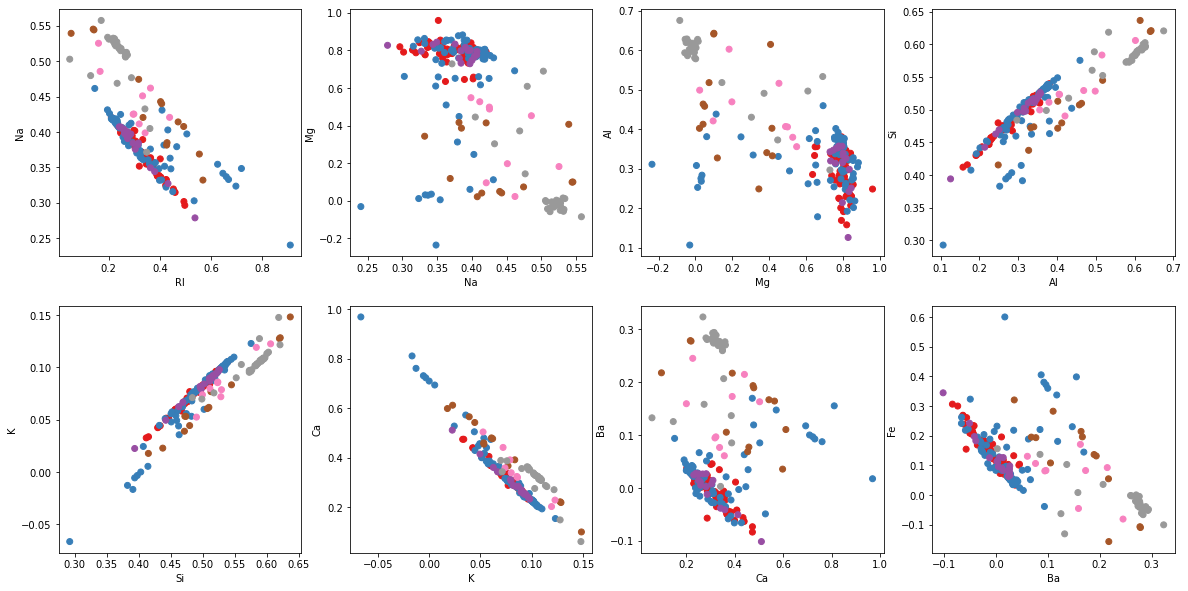

In [13]:
display_data(recovered_data)

In [16]:
# восстановление данных по 4 компонентам

pca2 = PCA(n_components=4)
pca2_data = pca2.fit_transform(data)
recovered_data = pca2.inverse_transform(pca2_data)

pd.concat([ 
    pd.DataFrame(data, columns=var_names[:-1]).var(),
    pd.DataFrame(recovered_data, columns=var_names[:-1]).var(),
], axis=1, keys=["data var", "recovered data var"]).T

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
data var,0.017772,0.015079,0.103201,0.024191,0.019130,0.011030,0.017494,0.024916,0.036503
recovered data var,0.016902,0.004732,0.102760,0.018471,0.016811,0.001918,0.016578,0.017499,0.035582


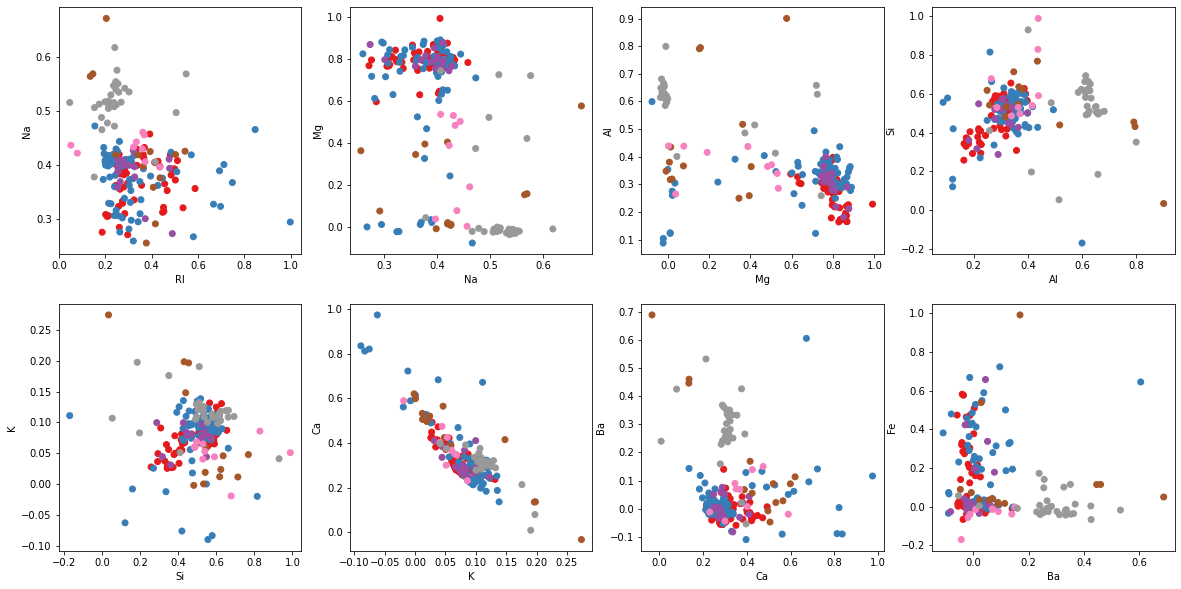

In [10]:
display_data(recovered_data)

### Исследование метода главных компонент при различных параметрах svd_solver

Объясненная дисперсия в %:  [0.45429569 0.17990097]
Собственные числа:          [5.1049308  3.21245688]


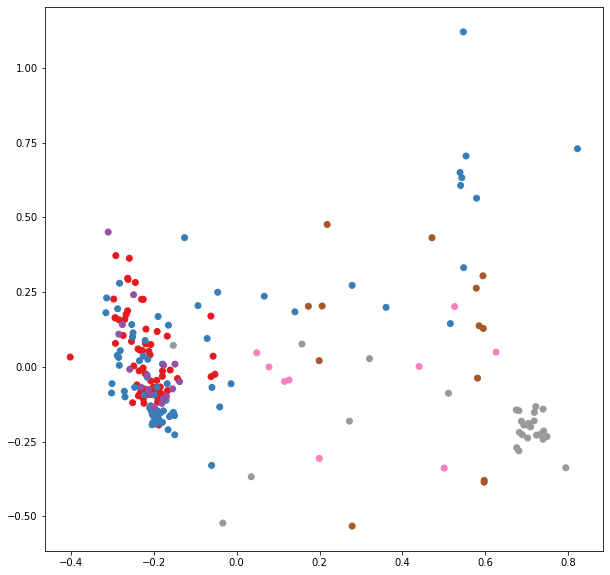

In [17]:
# full

pca = PCA(n_components = 2, svd_solver="full")
pca_data = pca.fit(data).transform(data)

print('Объясненная дисперсия в %: ', pca.explained_variance_ratio_)
print('Собственные числа:         ', pca.singular_values_)

plt.figure(figsize=(10, 10))
plt.scatter(pca_data[:,0],pca_data[:,1],c=labels,cmap='Set1')
plt.show()

Объясненная дисперсия в %:  [0.45429569 0.17990097]
Собственные числа:          [5.1049308  3.21245688]


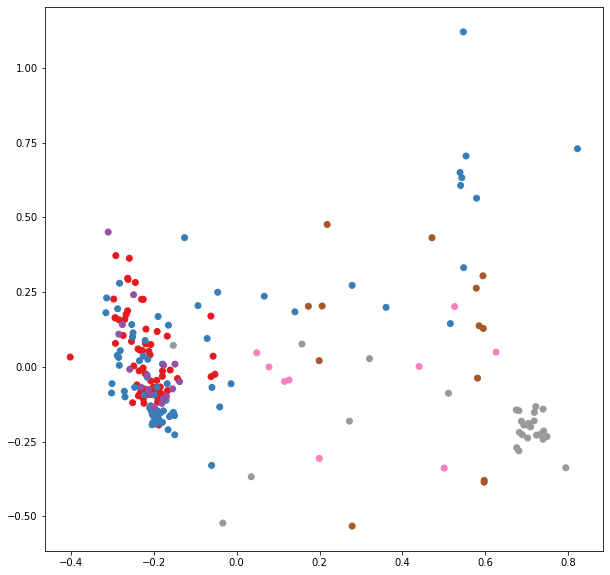

In [18]:
# arpack

pca = PCA(n_components = 2, svd_solver="arpack")
pca_data = pca.fit(data).transform(data)

print('Объясненная дисперсия в %: ', pca.explained_variance_ratio_)
print('Собственные числа:         ', pca.singular_values_)

plt.figure(figsize=(10, 10))
plt.scatter(pca_data[:,0],pca_data[:,1],c=labels,cmap='Set1')
plt.show()

Объясненная дисперсия в %:  [0.45429569 0.17990097]
Собственные числа:          [5.1049308  3.21245688]


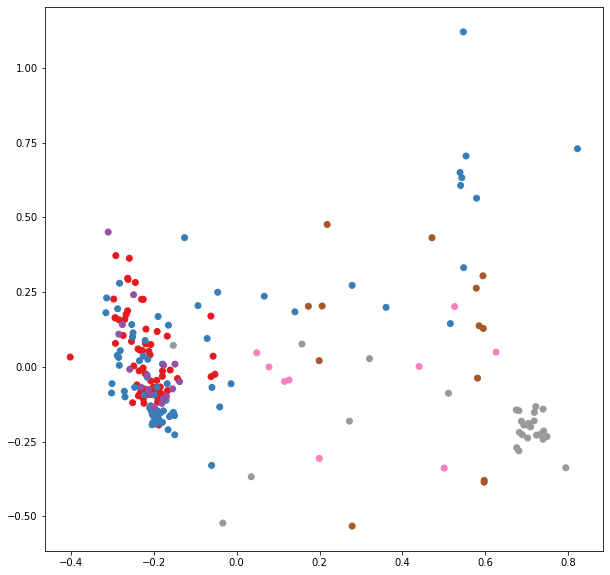

In [19]:
# randomized

pca = PCA(n_components = 2, svd_solver="randomized")
pca_data = pca.fit(data).transform(data)

print('Объясненная дисперсия в %: ', pca.explained_variance_ratio_)
print('Собственные числа:         ', pca.singular_values_)

plt.figure(figsize=(10, 10))
plt.scatter(pca_data[:,0],pca_data[:,1],c=labels,cmap='Set1')
plt.show()

## Модификация метода главных компонент

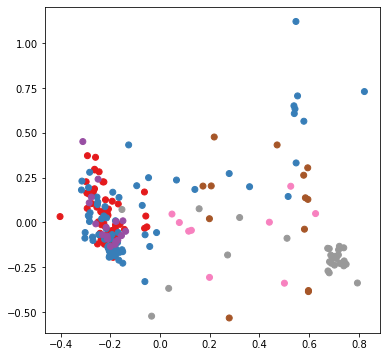

,1,2,explained
linear,26.060318,10.319879,0.634197


In [24]:
# linear

kernel_pca = KernelPCA(n_components = 2, kernel="linear")
kpca_ev = KernelPCA(n_components=data.shape[1], kernel="linear").fit(data).lambdas_
kernel_pca_data = kernel_pca.fit(data).transform(data)

plt.figure(figsize=(6, 6))
plt.scatter(kernel_pca_data[:,0],kernel_pca_data[:,1],c=labels,cmap='Set1')
plt.show()

pd.DataFrame({
    "linear": np.append(kernel_pca.lambdas_, kernel_pca.lambdas_.sum() / kpca_ev.sum()),
}, index=[1, 2, "explained"]).T

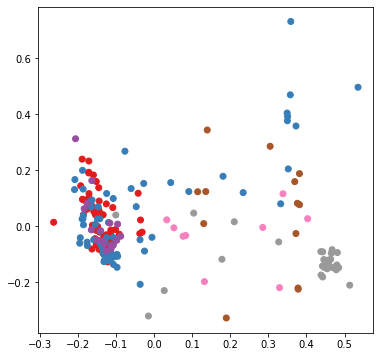

In [25]:
#poly

kernel_pca = KernelPCA(n_components=4, kernel="poly")
kernel_pca_data = kernel_pca.fit(data).transform(data)

plt.figure(figsize=(6, 6))
plt.scatter(kernel_pca_data[:,0],kernel_pca_data[:,1],c=labels,cmap='Set1')
plt.show()

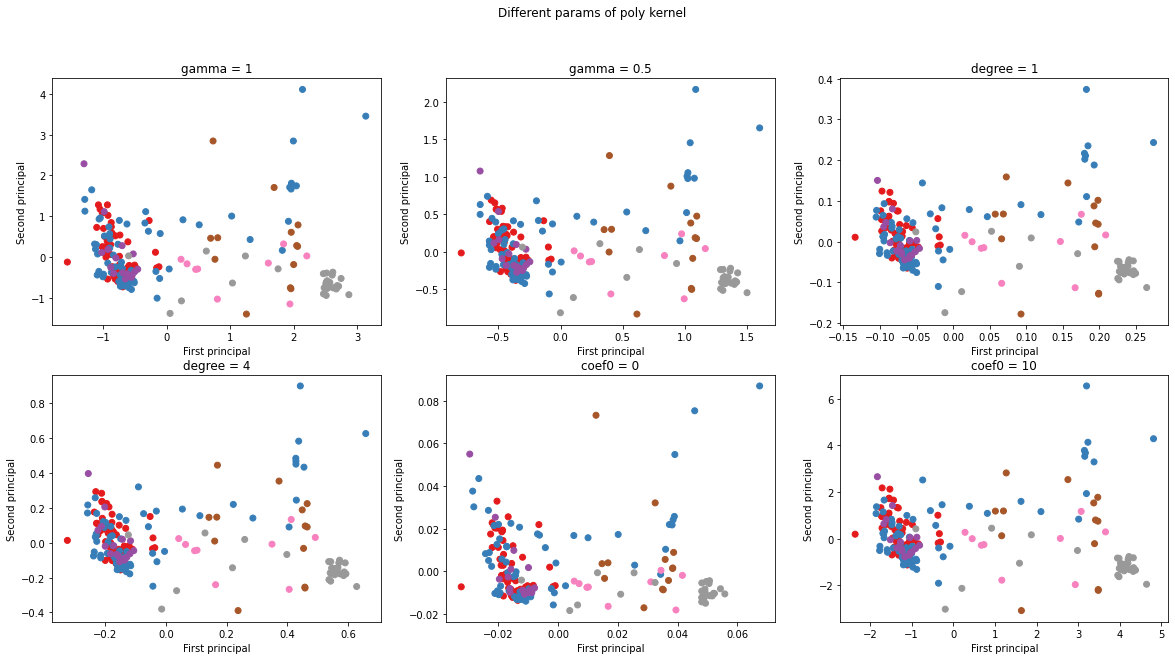

,1,2,"explained, %"
default,10.918196,4.319377,62.425064
gamma = 1,344.004959,139.713954,58.030996
gamma = 0.5,93.580987,37.372218,59.766201
degree = 1,2.895591,1.146653,63.419666
degree = 4,16.329092,6.467189,61.822522
coef0 = 0,0.131363,0.058304,53.776446
coef0 = 10,889.810298,352.277001,63.321358


In [41]:
def draw_kernel_pca(axs, plot_name, kernel_pca_data):
    axs.scatter(kernel_pca_data[:, 0], kernel_pca_data[:, 1], c=labels, cmap='Set1')
    axs.set_title(plot_name)
    axs.set_xlabel('First principal')
    axs.set_ylabel('Second principal')

poly_kernel_pca     = KernelPCA(n_components=2, kernel="poly")
poly_kernel_pca_g1  = KernelPCA(n_components=2, kernel="poly", gamma=1)
poly_kernel_pca_g05 = KernelPCA(n_components=2, kernel="poly", gamma=0.5)
poly_kernel_pca_d1  = KernelPCA(n_components=2, kernel="poly", degree=1)
poly_kernel_pca_d4  = KernelPCA(n_components=2, kernel="poly", degree=4)
poly_kernel_pca_c0  = KernelPCA(n_components=2, kernel="poly", coef0=0)
poly_kernel_pca_c10 = KernelPCA(n_components=2, kernel="poly", coef0=10)

poly_kpca_ev     = KernelPCA(n_components=data.shape[1], kernel="poly").fit(data).lambdas_
poly_kpca_ev_g1  = KernelPCA(n_components=data.shape[1], kernel="poly", gamma=1).fit(data).lambdas_
poly_kpca_ev_g05 = KernelPCA(n_components=data.shape[1], kernel="poly", gamma=0.5).fit(data).lambdas_
poly_kpca_ev_d1  = KernelPCA(n_components=data.shape[1], kernel="poly", degree=1).fit(data).lambdas_
poly_kpca_ev_d4  = KernelPCA(n_components=data.shape[1], kernel="poly", degree=4).fit(data).lambdas_
poly_kpca_ev_c0  = KernelPCA(n_components=data.shape[1], kernel="poly", coef0=0).fit(data).lambdas_
poly_kpca_ev_c10 = KernelPCA(n_components=data.shape[1], kernel="poly", coef0=10).fit(data).lambdas_

poly_kernel_pca_data = poly_kernel_pca.fit_transform(data)


fig, axs = plt.subplots(2, 3, figsize=(20, 10))
fig.suptitle("Different params of poly kernel", fontsize="large")

poly_data = {
    "gamma = 1":   poly_kernel_pca_g1.fit_transform(data),
    "gamma = 0.5": poly_kernel_pca_g05.fit_transform(data),
    "degree = 1":  poly_kernel_pca_d1.fit_transform(data),
    "degree = 4":  poly_kernel_pca_d4.fit_transform(data),
    "coef0 = 0":   poly_kernel_pca_c0.fit_transform(data),
    "coef0 = 10":  poly_kernel_pca_c10.fit_transform(data)
}
for i, (name, pca_data) in enumerate(poly_data.items()):
    draw_kernel_pca(axs[i//3, i%3], name, pca_data)

plt.show()

pd.DataFrame({
    "default":     np.append(poly_kernel_pca.lambdas_,     poly_kernel_pca.lambdas_.sum() *100    / poly_kpca_ev.sum()),
    "gamma = 1":   np.append(poly_kernel_pca_g1.lambdas_,  poly_kernel_pca_g1.lambdas_.sum() *100 / poly_kpca_ev_g1.sum()),
    "gamma = 0.5": np.append(poly_kernel_pca_g05.lambdas_, poly_kernel_pca_g05.lambdas_.sum()*100 / poly_kpca_ev_g05.sum()),
    "degree = 1":  np.append(poly_kernel_pca_d1.lambdas_,  poly_kernel_pca_d1.lambdas_.sum() *100 / poly_kpca_ev_d1.sum()),
    "degree = 4":  np.append(poly_kernel_pca_d4.lambdas_,  poly_kernel_pca_d4.lambdas_.sum() *100 / poly_kpca_ev_d4.sum()),
    "coef0 = 0":   np.append(poly_kernel_pca_c0.lambdas_,  poly_kernel_pca_c0.lambdas_.sum() *100 / poly_kpca_ev_c0.sum()),
    "coef0 = 10":  np.append(poly_kernel_pca_c10.lambdas_, poly_kernel_pca_c10.lambdas_.sum() *100 / poly_kpca_ev_c10.sum())
}, index=[1, 2, "explained, %"]).T


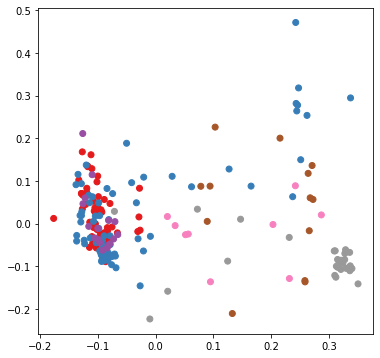

In [28]:
#rbf

kernel_pca = KernelPCA(n_components=4, kernel="rbf")
kernel_pca_data = kernel_pca.fit(data).transform(data)

plt.figure(figsize=(6, 6))
plt.scatter(kernel_pca_data[:,0],kernel_pca_data[:,1],c=labels,cmap='Set1')
plt.show()

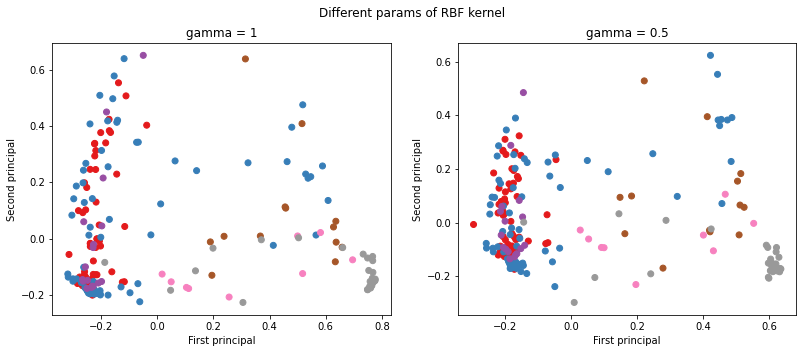

,1,2,"explained, %"
default,5.351453,2.018054,62.786000
gamma = 1,28.217500,9.985555,60.213668
gamma = 0.5,18.713311,6.434521,60.889491


In [43]:
rbf_kernel_pca     = KernelPCA(n_components=2, kernel="rbf")
rbf_kernel_pca_g1  = KernelPCA(n_components=2, kernel="rbf", gamma=1)
rbf_kernel_pca_g05 = KernelPCA(n_components=2, kernel="rbf", gamma=0.5)

rbf_kpca_ev        = KernelPCA(n_components=data.shape[1], kernel="rbf").fit(data).lambdas_
rbf_kpca_ev_g1     = KernelPCA(n_components=data.shape[1], kernel="rbf", gamma=1).fit(data).lambdas_
rbf_kpca_ev_g05    = KernelPCA(n_components=data.shape[1], kernel="rbf", gamma=0.5).fit(data).lambdas_

rbf_kernel_pca_data = rbf_kernel_pca.fit_transform(data)

fig, axs = plt.subplots(1, 2, figsize=(13.33, 5))
fig.suptitle("Different params of RBF kernel", fontsize="large")

rbf_data = {
    "gamma = 1":   rbf_kernel_pca_g1.fit_transform(data),
    "gamma = 0.5": rbf_kernel_pca_g05.fit_transform(data),
}
for i, (name, pca_data) in enumerate(rbf_data.items()):
    draw_kernel_pca(axs[i], name, pca_data)

plt.show()

pd.DataFrame({
    "default":     np.append(rbf_kernel_pca.lambdas_,     rbf_kernel_pca.lambdas_.sum()  *100   / rbf_kpca_ev.sum()),
    "gamma = 1":   np.append(rbf_kernel_pca_g1.lambdas_,  rbf_kernel_pca_g1.lambdas_.sum() *100 / rbf_kpca_ev_g1.sum()),
    "gamma = 0.5": np.append(rbf_kernel_pca_g05.lambdas_, rbf_kernel_pca_g05.lambdas_.sum() *100 / rbf_kpca_ev_g05.sum()),
}, index=[1, 2, "explained, %"]).T

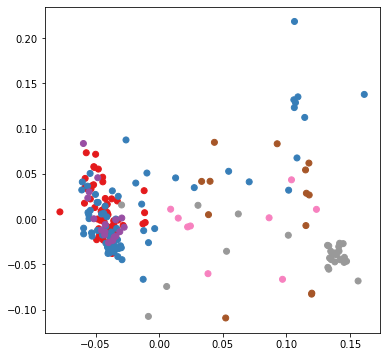

In [34]:
# sigmoid

kernel_pca = KernelPCA(n_components=4, kernel="sigmoid")
kernel_pca_data = kernel_pca.fit(data).transform(data)

plt.figure(figsize=(6, 6))
plt.scatter(kernel_pca_data[:,0],kernel_pca_data[:,1],c=labels,cmap='Set1')
plt.show()

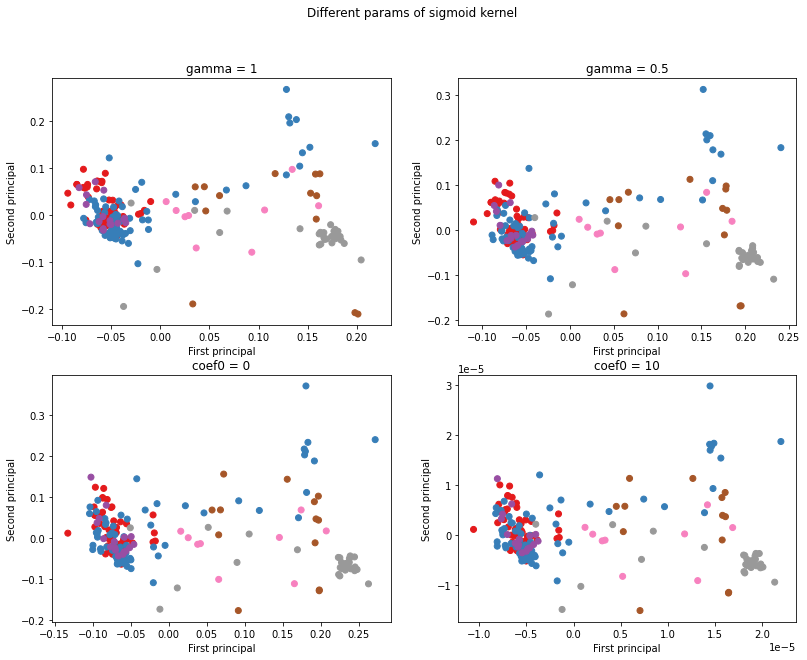

,1,2,"explained, %"
default,1.006181e+00,3.998375e-01,63.905427
gamma = 1,1.652027e+00,7.699351e-01,65.616211
gamma = 0.5,2.202103e+00,9.114499e-01,65.291688
coef0 = 0,2.852693e+00,1.129250e+00,63.514218
coef0 = 10,1.876208e-08,7.467428e-09,64.004929


In [45]:
sigmoid_kernel_pca     = KernelPCA(n_components=2, kernel="sigmoid")
sigmoid_kernel_pca_g1  = KernelPCA(n_components=2, kernel="sigmoid", gamma=1)
sigmoid_kernel_pca_g05 = KernelPCA(n_components=2, kernel="sigmoid", gamma=0.5)
sigmoid_kernel_pca_c0  = KernelPCA(n_components=2, kernel="sigmoid", coef0=0)
sigmoid_kernel_pca_c10 = KernelPCA(n_components=2, kernel="sigmoid", coef0=10)

sigmoid_kpca_ev     = KernelPCA(n_components=data.shape[1], kernel="sigmoid").fit(data).lambdas_
sigmoid_kpca_ev_g1  = KernelPCA(n_components=data.shape[1], kernel="sigmoid", gamma=1).fit(data).lambdas_
sigmoid_kpca_ev_g05 = KernelPCA(n_components=data.shape[1], kernel="sigmoid", gamma=0.5).fit(data).lambdas_
sigmoid_kpca_ev_c0  = KernelPCA(n_components=data.shape[1], kernel="sigmoid", coef0=0).fit(data).lambdas_
sigmoid_kpca_ev_c10 = KernelPCA(n_components=data.shape[1], kernel="sigmoid", coef0=10).fit(data).lambdas_

sigmoid_kernel_pca_data = sigmoid_kernel_pca.fit_transform(data)

fig, axs = plt.subplots(2, 2, figsize=(13.33, 10))
fig.suptitle("Different params of sigmoid kernel", fontsize="large")

sigmoid_data = {
    "gamma = 1":   sigmoid_kernel_pca_g1.fit_transform(data),
    "gamma = 0.5": sigmoid_kernel_pca_g05.fit_transform(data),
    "coef0 = 0":   sigmoid_kernel_pca_c0.fit_transform(data),
    "coef0 = 10":  sigmoid_kernel_pca_c10.fit_transform(data)
}
for i, (name, pca_data) in enumerate(sigmoid_data.items()):
    draw_kernel_pca(axs[i//2, i%2], name, pca_data)

plt.show()

pd.DataFrame({
    "default":     np.append(sigmoid_kernel_pca.lambdas_,     sigmoid_kernel_pca.lambdas_.sum()  *100   / sigmoid_kpca_ev.sum()),
    "gamma = 1":   np.append(sigmoid_kernel_pca_g1.lambdas_,  sigmoid_kernel_pca_g1.lambdas_.sum() *100 / sigmoid_kpca_ev_g1.sum()),
    "gamma = 0.5": np.append(sigmoid_kernel_pca_g05.lambdas_, sigmoid_kernel_pca_g05.lambdas_.sum() *100 / sigmoid_kpca_ev_g05.sum()),
    "coef0 = 0":   np.append(sigmoid_kernel_pca_c0.lambdas_,  sigmoid_kernel_pca_c0.lambdas_.sum() *100 / sigmoid_kpca_ev_c0.sum()),
    "coef0 = 10":  np.append(sigmoid_kernel_pca_c10.lambdas_, sigmoid_kernel_pca_c10.lambdas_.sum() *100 / sigmoid_kpca_ev_c10.sum())
}, index=[1, 2, "explained, %"]).T

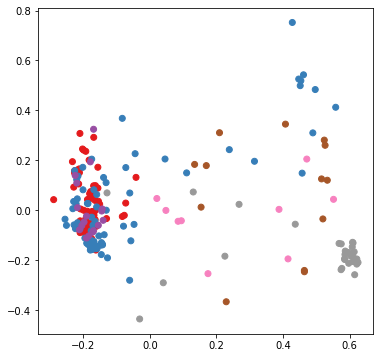

In [36]:
# cosine

kernel_pca = KernelPCA(n_components=4, kernel="cosine")
kernel_pca_data = kernel_pca.fit(data).transform(data)

plt.figure(figsize=(6, 6))
plt.scatter(kernel_pca_data[:,0],kernel_pca_data[:,1],c=labels,cmap='Set1')
plt.show()

### SparsePCA

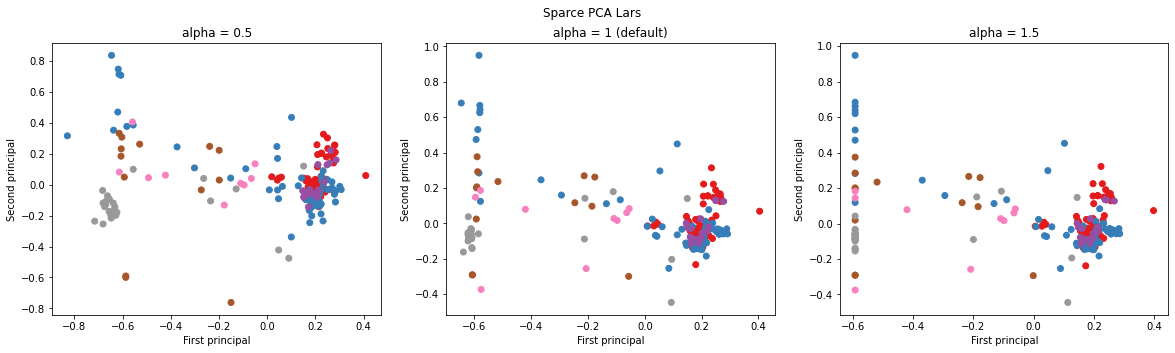

In [37]:
def draw_sparse_pca(axs, plot_name, sparse_pca_data):
    axs.scatter(sparse_pca_data[:, 0], sparse_pca_data[:, 1], c=labels, cmap='Set1')
    axs.set_title(plot_name)
    axs.set_xlabel('First principal')
    axs.set_ylabel('Second principal')

# метод lars

sparse_pca_lars     = SparsePCA(n_components=4, method="lars")
sparse_pca_lars_a05 = SparsePCA(n_components=4, method="lars", alpha=0.5)
sparse_pca_lars_a15 = SparsePCA(n_components=4, method="lars", alpha=1.5)

sparse_pca_lars_data = {
    "alpha = 0.5":         sparse_pca_lars_a05.fit_transform(data),
    "alpha = 1 (default)": sparse_pca_lars.fit_transform(data),
    "alpha = 1.5":         sparse_pca_lars_a15.fit_transform(data),
}

fig, axs = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle("Sparce PCA Lars")

for i, (name, sparse_data) in enumerate(sparse_pca_lars_data.items()):
    draw_sparse_pca(axs[i], name, sparse_data)

plt.show()

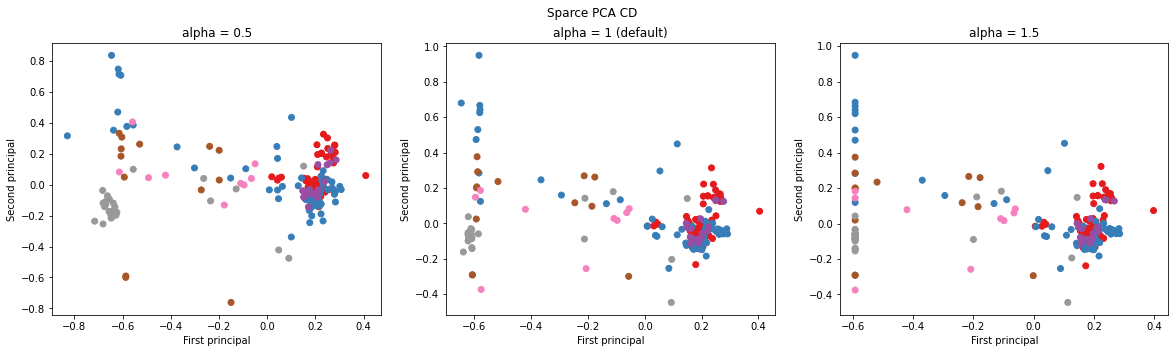

In [38]:
# метод cd

sparse_pca_cd       = SparsePCA(n_components=4, method="cd")
sparse_pca_cd_a05   = SparsePCA(n_components=4, method="cd", alpha=0.5)
sparse_pca_cd_a15   = SparsePCA(n_components=4, method="cd", alpha=1.5)

sparse_pca_cd_data = {
    "alpha = 0.5":         sparse_pca_cd_a05.fit_transform(data),
    "alpha = 1 (default)": sparse_pca_cd.fit_transform(data),
    "alpha = 1.5":         sparse_pca_cd_a15.fit_transform(data),
}

fig, axs = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle("Sparce PCA CD")

for i, (name, sparse_data) in enumerate(sparse_pca_cd_data.items()):
    draw_sparse_pca(axs[i], name, sparse_data)

plt.show()

## Факторный анализ

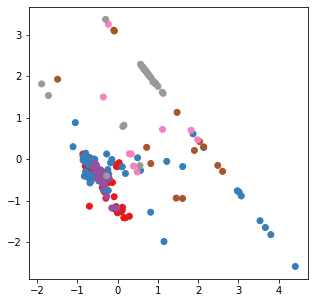

In [39]:
fa = FactorAnalysis(n_components=2)
fa_data = fa.fit_transform(data)

plt.figure(figsize=(5, 5))
plt.scatter(fa_data[:, 0], fa_data[:, 1], c=labels, cmap='Set1')
plt.show()